# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv('./datasets/real_estate_data.csv', sep='\t')

# Прочитаем первые 10 строк таблицы
with pd.option_context('display.max_columns', None): 
    display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# Выведем общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

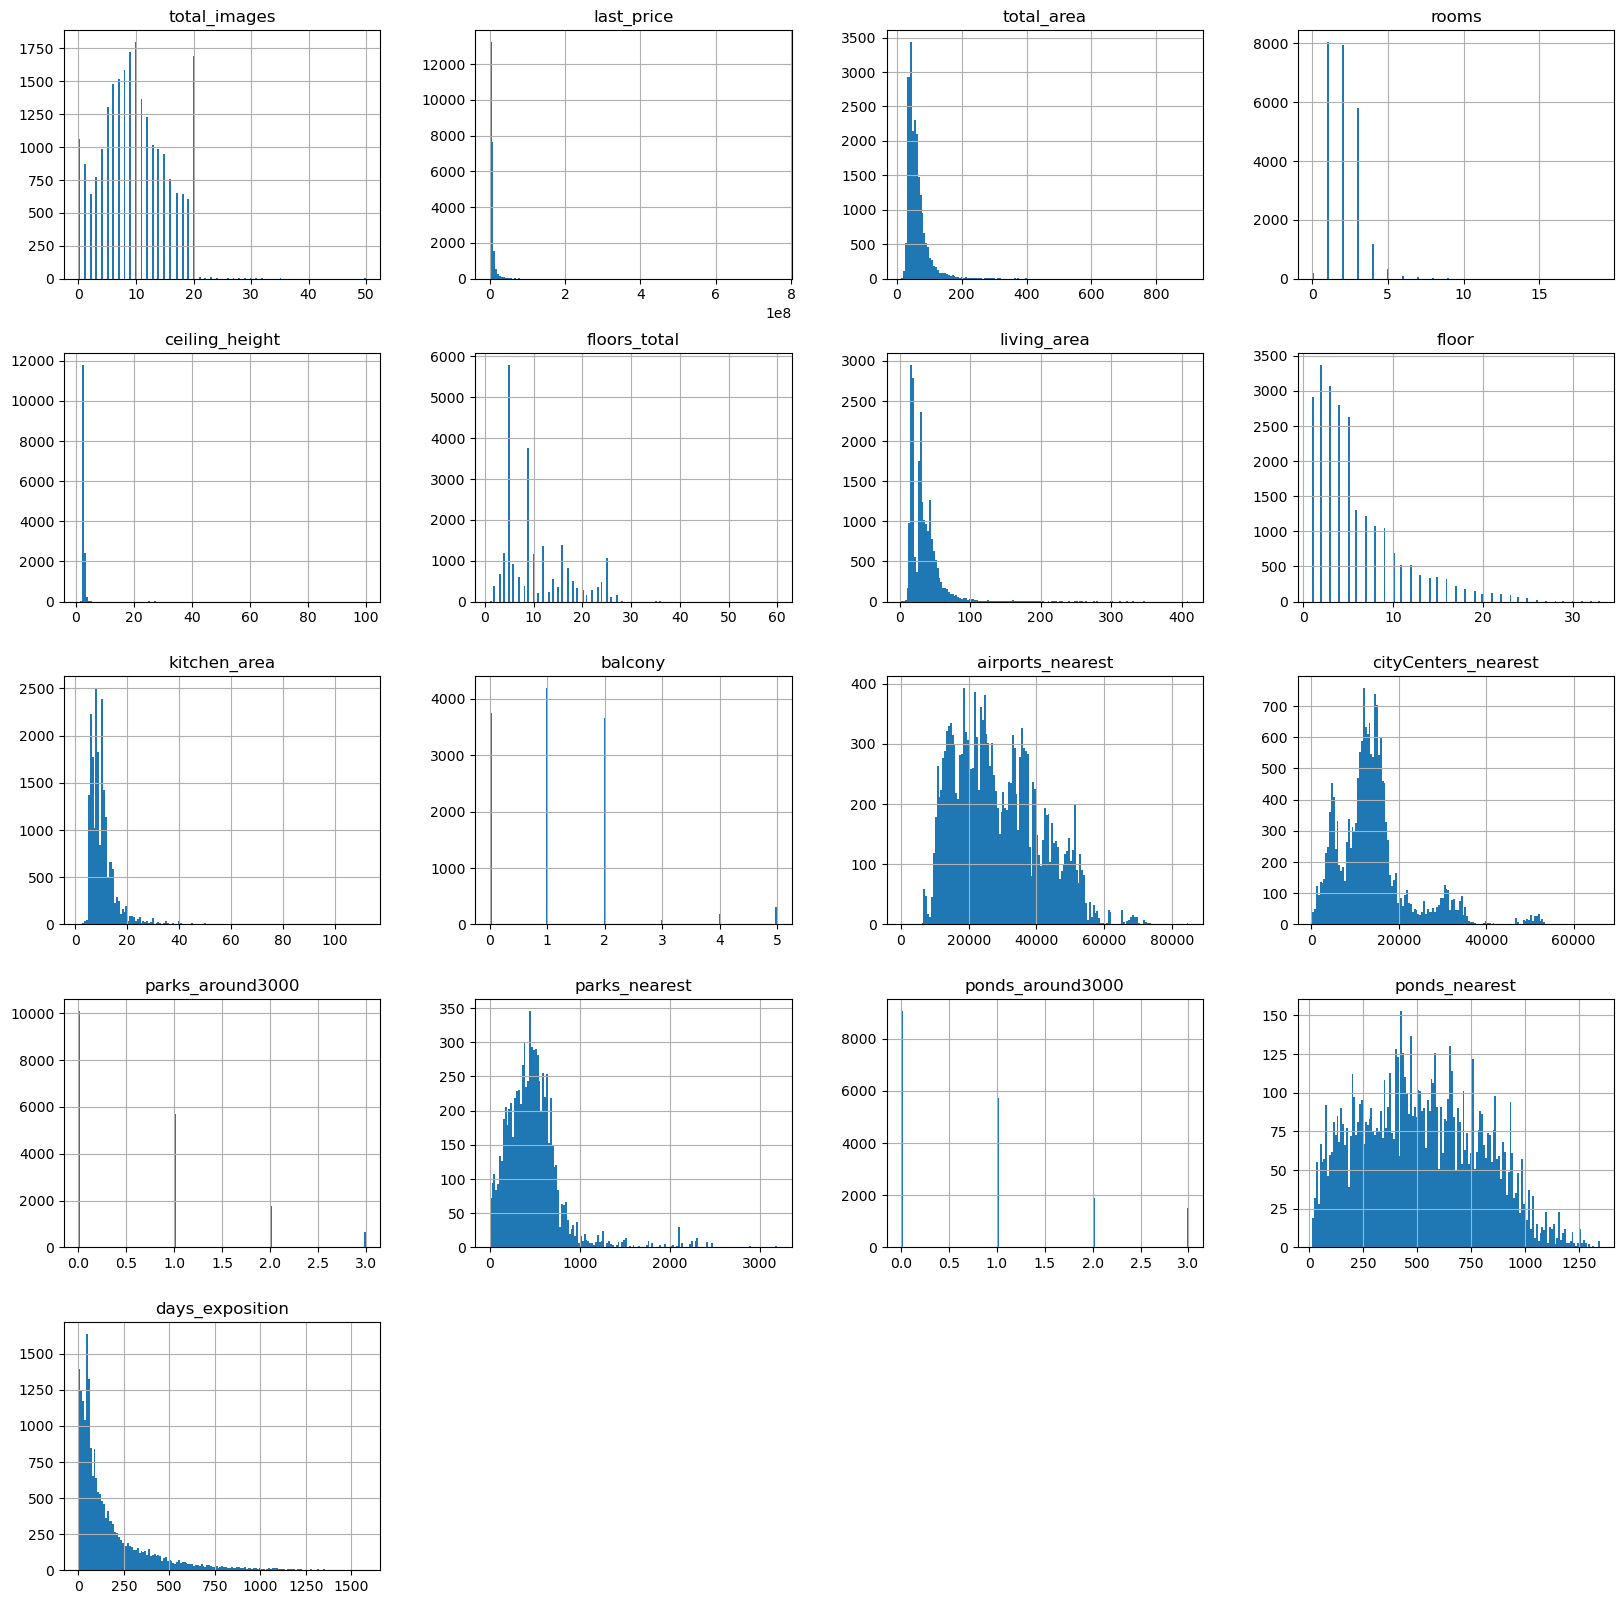

In [3]:
# Построим гистограммы для каждого столбца
# Для определения количество bins воспользуемся стандартной формулой из Excel - квадратный корень из количества строк в таблице
data.hist(figsize=(20, 20), bins=np.sqrt(data.shape[0]).astype(int))

### Выполните предобработку данных

#### Переименование столбцов

In [4]:
# Приведём названия столбцов к стандарту snake_case и переименуем столбцы, чтобы они были более понятными
data.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony_total', 'locality_name', 'airports_nearest_meters', 'city_centers_nearest_meters', 'parks_around_3k_meters', 'parks_nearest_meters', 'ponds_around_3k_meters', 'ponds_nearest_meters', 'days_exposition']

#### Обработка пропусков

In [5]:
# Проверим на наличие явных дубликатов
data.duplicated().sum()

0

In [6]:
# Определим количество пропусков в каждом столбце
data.isnull().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                  9195
floors_total                      86
living_area                     1903
floor                              0
is_apartment                   20924
is_studio                          0
is_open_plan                       0
kitchen_area                    2278
balcony_total                  11519
locality_name                     49
airports_nearest_meters         5542
city_centers_nearest_meters     5519
parks_around_3k_meters          5518
parks_nearest_meters           15620
ponds_around_3k_meters          5518
ponds_nearest_meters           14589
days_exposition                 3181
dtype: int64

In [7]:
# Посмотрим на долю пропусков в каждом столбце
data.isnull().sum() / data.shape[0]

total_images                   0.000000
last_price                     0.000000
total_area                     0.000000
first_day_exposition           0.000000
rooms                          0.000000
ceiling_height                 0.387991
floors_total                   0.003629
living_area                    0.080299
floor                          0.000000
is_apartment                   0.882906
is_studio                      0.000000
is_open_plan                   0.000000
kitchen_area                   0.096122
balcony_total                  0.486054
locality_name                  0.002068
airports_nearest_meters        0.233850
city_centers_nearest_meters    0.232879
parks_around_3k_meters         0.232837
parks_nearest_meters           0.659100
ponds_around_3k_meters         0.232837
ponds_nearest_meters           0.615596
days_exposition                0.134225
dtype: float64

In [8]:
# Заполним пропуски в 'balcony' нулями, так как скорее всего пропуски означают, что в квартире нет балконов
data['balcony_total'] = data['balcony_total'].fillna(0)

In [9]:
# Заполним пропуски в 'floors_total' единицами, так как скорее всего пропуски означают, что в доме всего один этаж
data['floors_total'] = data['floors_total'].fillna(1)

In [10]:
# Заполним пропуски в 'locality_name' строкой 'unknown', так как название населённого пункта неизвестно
data['locality_name'] = data['locality_name'].fillna('unknown')

In [11]:
# Заполним пропуски в 'parks_around_3k_meters' нулями, так как скорее всего пропуски означают, что в радиусе 3 км нет парков
data['parks_around_3k_meters'] = data['parks_around_3k_meters'].fillna(0)

In [12]:
# Заполним пропуски в 'ponds_around_3k_meters' нулями, так как скорее всего пропуски означают, что в радиусе 3 км нет водоёмов
data['ponds_around_3k_meters'] = data['ponds_around_3k_meters'].fillna(0)

In [13]:
# Заполним пропуски в 'days_exposition' нулями, так как скорее всего пропуски означают, что объявление ещё не снято
data['days_exposition'] = data['days_exposition'].fillna(0)

In [14]:
# Заполним пропуски в 'is_apartment' False, так как скорее всего пропуски означают, что квартира не является апартаментами
data['is_apartment'] = data['is_apartment'].fillna(False)

In [15]:
# Посмотрим на описание столбца 'ceiling_height'
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [16]:
# Видим, что в столбце 'ceiling_height' есть аномально большие значения.
# Посмотрим какие уникальные значения есть в столбце 'ceiling_height' и отсортируем их по возрастанию.
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


In [17]:
# Вряд ли в квартирах может быть высота потолков больше 10 метров
# Разделим значения в столбце 'ceiling_height', которые больше 10 метров на 10
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10

In [18]:
# Заполним пропуски в столбце 'ceiling_height' медианой, в среднем высота потолков в квартирах не сильно отличается
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [19]:
# Заполним пропуски в 'living_area' медианным значением для квартир с таким же количеством комнат
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

In [20]:
# По такому же принципу, как для 'living_area', заполним пропуски в 'kitchen_area'
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))

In [21]:
# Посмотрим на описание столбца 'city_centers_nearest_meters'
data['city_centers_nearest_meters'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest_meters, dtype: float64

<Axes: >

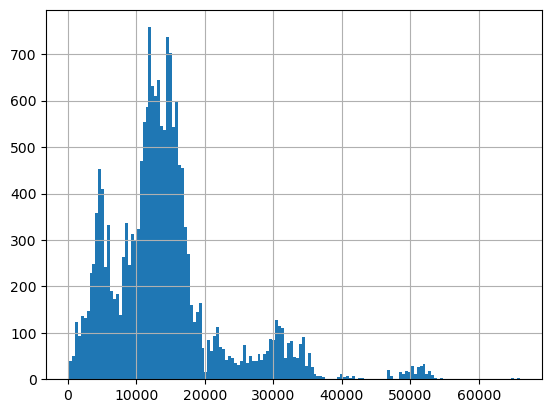

In [22]:
# Построим гистограмму для расстояния до центра города
data['city_centers_nearest_meters'].hist(bins=np.sqrt(data.shape[0]).astype(int))

In [23]:
# Посмотрим на описание для 'city_centers_nearest_meters' без выбросов
data.query('city_centers_nearest_meters < 36000')['city_centers_nearest_meters'].describe()

count    17840.000000
mean     13533.946693
std       7197.486104
min        181.000000
25%       9089.000000
50%      12990.000000
75%      16094.000000
max      35892.000000
Name: city_centers_nearest_meters, dtype: float64

In [24]:
# Выбросы почти ничего не изменили для медианы, поэтому заполним пропуски медианой
data['city_centers_nearest_meters'] = data['city_centers_nearest_meters'].fillna(data['city_centers_nearest_meters'].median())

In [25]:
# Посмотрим на описание столбца 'airports_nearest_meters'
data['airports_nearest_meters'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest_meters, dtype: float64

<Axes: >

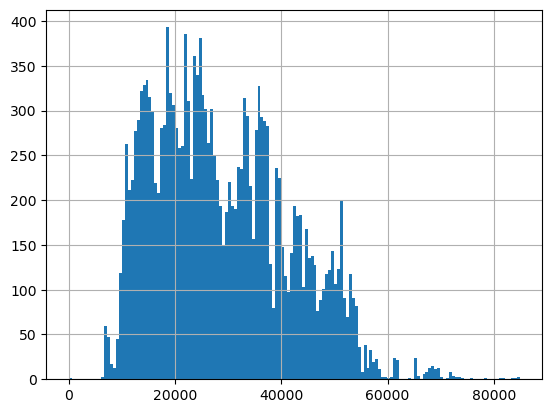

In [26]:
# Построим гистограмму для расстояния до ближайшего аэропорта
data['airports_nearest_meters'].hist(bins=np.sqrt(data.shape[0]).astype(int))

In [27]:
# Удалим выбросы и посмотрим на описание
data.query('5000 < airports_nearest_meters < 60000')['airports_nearest_meters'].describe()

count    17982.000000
mean     28425.051329
std      12103.533416
min       6450.000000
25%      18518.000000
50%      26525.000000
75%      36893.750000
max      59705.000000
Name: airports_nearest_meters, dtype: float64

In [28]:
# Выбросы опять же почти ничего не изменили для медианы, поэтому заполним пропуски медианой
data['airports_nearest_meters'] = data['airports_nearest_meters'].fillna(data['airports_nearest_meters'].median())

In [29]:
# Посмотрим на описание столбцов 'ponds_nearest_meters' и 'parks_nearest_meters'
display(data['ponds_nearest_meters'].describe())
data['parks_nearest_meters'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest_meters, dtype: float64

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest_meters, dtype: float64

In [30]:
# Есть подозрение, что пропуски в столбцах 'ponds_nearest_meters' и 'parks_nearest_meters' появились из-за того, что расстояние до ближайшего водоёма или парка больше 3 км
# Проверим, что нет таких строк, где в 'ponds_around_3k_meters' не нулевое значение, а в 'ponds_nearest_meters' есть пропуск
display(data.query('ponds_around_3k_meters != 0')['ponds_nearest_meters'].isnull().sum())

# Проверим то же самое для 'parks_nearest_meters' и 'parks_around_3k_meters'
data.query('parks_around_3k_meters != 0')['parks_nearest_meters'].isnull().sum()

0

0

In [31]:
# Проверим, что пропуски заполнены во всех столбцах, кроме 'ponds_nearest_meters' и 'parks_nearest_meters'
data.isnull().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     0
floors_total                       0
living_area                        0
floor                              0
is_apartment                       0
is_studio                          0
is_open_plan                       0
kitchen_area                     197
balcony_total                      0
locality_name                      0
airports_nearest_meters            0
city_centers_nearest_meters        0
parks_around_3k_meters             0
parks_nearest_meters           15620
ponds_around_3k_meters             0
ponds_nearest_meters           14589
days_exposition                    0
dtype: int64

##### Промежуточный вывод по заполнению пропусков

В данных были пропуски в столбцах `'balcony_total'`, `'floors_total'`, `'locality_name'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'`, `'is_apartment'`, `'ceiling_height'`, `'city_centers_nearest_meters'`, `'living_area'`, `'kitchen_area'`, `'airports_nearest_meters'`. В столбцах `'ponds_nearest_meters'` и `'parks_nearest_meters'` я намерено оставил пропуски.

Пропуски в каждом столбцы были по разным причинам:
- В `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'` и `'floors_total'` пропуски были заполнены нулями или единицами, как в последнем случае. Я думаю, что для этих столбцов пропуски означают, что в квартире нет балконов, в доме всего один этаж, в радиусе 3 км нет парков и водоёмов, а объявление ещё не снято.
- В `'locality_name'` и `'is_apartment'` пропуски были заполнены строкой `'unknown'` и значением `False` соответственно, так как название населённого пункта неизвестно и квартира не является апартаментами.
- `'ceiling_height'`, `'city_centers_nearest_meters'`, `'living_area'`, `'kitchen_area'`, `'airports_nearest_meters'` - это столбцы с количественными значениями, пропусков не такое большое количество в процентном соотношении и поэтому можно заполнить медианой. Пропуски в данных столбцах могли появиться из-за того, что некоторые данные формировались автоматически и могли быть ошибки в этом процессе, которые привели к пропускам. Также пропуски могли появиться из-за того, что пользователь не заполнил эти поля или данные были утеряны при выгрузке.
- В `'ponds_nearest_meters'` и `'parks_nearest_meters'` пропуски были оставлены, так как по всей видимости они появились из-за того, что расстояние до ближайшего водоёма или парка не учитывалось, если оно больше 3 км. Я проверил это тем, максимальные значения этих столбцов не превышает ~3км. Также нет таких строк, где указывается, что в радиусе 3 км есть парк или водоём, а в столбце с расстоянием до них есть пропуск. Поэтому заполнить пропуски в этих столбцах не получится, но и удалять эти столбцы нельзя, так как они помогут нам в дальнейшем анализе.

#### Изменение типов данных

In [32]:
# Посмотрим на типы данных в таблице
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition            object
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
is_studio                         bool
is_open_plan                      bool
kitchen_area                   float64
balcony_total                  float64
locality_name                   object
airports_nearest_meters        float64
city_centers_nearest_meters    float64
parks_around_3k_meters         float64
parks_nearest_meters           float64
ponds_around_3k_meters         float64
ponds_nearest_meters           float64
days_exposition                float64
dtype: object

In [33]:
# Изменим тип данных в столбце 'first_day_exposition' на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
# Изменим тип данных в столбцах 'floors_total', 'balcony_total', 'parks_around_3k_meters', 'ponds_around_3k_meters' и 'days_exposition' на int

for column in ['floors_total', 'balcony_total', 'parks_around_3k_meters', 'ponds_around_3k_meters', 'days_exposition']:
    data[column] = data[column].astype('int')

In [35]:
# Проверим, что типы данных изменились на нужные
data.dtypes

total_images                            int64
last_price                            float64
total_area                            float64
first_day_exposition           datetime64[ns]
rooms                                   int64
ceiling_height                        float64
floors_total                            int64
living_area                           float64
floor                                   int64
is_apartment                             bool
is_studio                                bool
is_open_plan                             bool
kitchen_area                          float64
balcony_total                           int64
locality_name                          object
airports_nearest_meters               float64
city_centers_nearest_meters           float64
parks_around_3k_meters                  int64
parks_nearest_meters                  float64
ponds_around_3k_meters                  int64
ponds_nearest_meters                  float64
days_exposition                   

##### Промежуточный вывод по изменению типов данных

В таблице были изменены типы данных в столбцах `'first_day_exposition'`, `'floors_total'`, `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'` и `'days_exposition'`.

Я изменил типы по следующим причинам:
- В столбце `'first_day_exposition'` тип данных был изменён на `datetime`, так как это дата публикации объявления и нам нужно будет работать с датами.
- В столбцах `'floors_total'`, `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'` и `'days_exposition'` тип данных был изменён на `int`, так как в данном случае не могут быть дробные значения. То есть не может быть такого, что всего в доме 1.5 этажа или в радиусе 3 км 1.5 парка и тому подобное.

#### Обработка неявных дубликатов

In [36]:
# Посмотрим на уникальные значения в столбце 'locality_name'.
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [37]:
# Видим, что в названиях населённых пунктов есть разные написания, но с одним и тем же значением.
# Приведём названия населённых пунктов к единому виду.

different_names_for_village = [
    'село ',
    'садовое товарищество ' ,
    'садоводческое некоммерческое товарищество ',
    'поселок станции ',
    'поселок при железнодорожной станции ',
    'поселок городского типа ',
    'коттеджный поселок ',
    'деревня ',
    'городской поселок ',
]
standard_name_for_village = 'поселок '

data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(different_names_for_village, standard_name_for_village, regex=True)
)

# Проверим, что названия изменились.
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'поселок Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'поселок Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'поселок Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'поселок Новая Ропша', 'Павловск', 'поселок Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'поселок Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'поселок Понтонный',
       'Сясьстрой', 'поселок Старая', 'поселок Лесколово',
       'поселок Новый Свет', 'Сланцы', 'поселок Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'С

##### Промежуточный вывод по обработке неявных дубликатов

В столбце `'locality_name'` были неявные дубликаты, которые были обработаны. В названиях населённых пунктов были разные написания, но с одним и тем же значением.
Я привёл названия населённых пунктов к единому виду.

#### Обработка аномалий

In [38]:
# Посмотрим есть ли аномалии в столбце 'rooms'.
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [39]:
# Удалим выбросы в столбце 'rooms', оставив только значения меньше, либо равные 10 комнатам и посмотрим на описание для rooms и total_area.
display(data.query('rooms <= 10')['rooms'].describe())
data.query('rooms <= 10')['total_area'].describe()

count    23691.000000
mean         2.066608
std          1.055027
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

count    23691.00000
mean        60.23730
std         34.88976
min         12.00000
25%         40.00000
50%         52.00000
75%         69.80000
max        631.20000
Name: total_area, dtype: float64

In [40]:
# Выбросов не много, а оставшиеся максимальные данные вполне соответствуют пентхаусам, поэтому считаю, что аномалии можно удалить.
data = data.query('rooms <= 10')

##### Промежуточный вывод по обработке аномалий

В столбце `'rooms'` были значения, которые превышали 10 комнат, что маловероятно, поэтому я удалил эти строки.
Также были аномальные значения в столбце `'ceiling_height'` - высота некоторых потолков была выше 10 метров, что мало возможно, такие значения были разделены на 10.

### Вывод по предобработке данных

В данных были выявлены следующие проблемы:
- Названия столбцов были в разном регистре и с разными названиями. Я привёл названия столбцов к стандарту snake_case и переименовал столбцы, чтобы они были более понятными.
- В столбцах (`'balcony_total'`, `'floors_total'`, `'locality_name'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'`, `'is_apartment'`, `'ceiling_height'`, `'city_centers_nearest_meters'`, `'living_area'`, `'kitchen_area'`, `'airports_nearest_meters'`) были пропуски, я заполнил те пропуски, которые можно было заполнить, а в остальных случаях (`'ponds_nearest_meters'` и `'parks_nearest_meters'`) пропуски оставил. 
- Устранены аномалии в столбцах `'rooms'` и `'ceiling_height'`.
- Также были изменены типы данных в столбцах `'first_day_exposition'`, `'floors_total'`, `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'` и `'days_exposition'`, чтобы они соответствовали действительности и с ними в дальнейшем было удобно работать.
- Также были обработаны неявные дубликаты в столбце `'locality_name'` - названия были приведены к единому виду.

### Добавьте в таблицу новые столбцы

In [41]:
# Добавим столбец с ценой квадратного метра и округлим значения до двух знаков после запятой.
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)

# Добавим столбец с днём недели публикации объявления.
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления.
data['month_exposition'] = data['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления.
data['year_exposition'] = data['first_day_exposition'].dt.year

# Добавим столбец с типом этажа квартиры: "первый", "последний", "другой".
# Функция для определения типа этажа квартиры:
def floor_type(row):
    if row['floor'] == 1:
        floor_name = 'первый'
    elif row['floor'] == row['floors_total']:
        floor_name = 'последний'
    else:
        floor_name = 'другой'
    return floor_name   
    
data['floor_type'] = data.apply(floor_type, axis=1)

# Добавим столбец с расстоянием до центра города в километрах и округлим значения до целых чисел.
data['city_centers_nearest_km'] = (data['city_centers_nearest_meters'] / 1000).round()

In [42]:
# Проверим, что столбцы добавились
with pd.option_context('display.max_columns', None): 
    display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_total,locality_name,airports_nearest_meters,city_centers_nearest_meters,parks_around_3k_meters,parks_nearest_meters,ponds_around_3k_meters,ponds_nearest_meters,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,26726.0,13098.5,0,NaN,0,NaN,55,95065.79,0,9,2018,другой,13.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок Мурино,26726.0,13098.5,0,NaN,0,NaN,189,87454.76,2,5,2018,другой,13.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.59,6,2,2017,другой,15.0


### Вывод по добавлению новых столбцов

В таблицу были добавлены следующие столбцы для дальнейшего анализа:
- `'price_per_square_meter'` - цена одного квадратного метра;
- `'weekday_exposition'` - день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- `'month_exposition'` - месяц публикации объявления;
- `'year_exposition'` - год публикации объявления;
- `'floor_type'` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `'city_centers_nearest_km'` - расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

#### Изучение и описание параметров

In [43]:
# Посмотрим на описание столбца для общей площади
data['total_area'].describe()

count    23691.00000
mean        60.23730
std         34.88976
min         12.00000
25%         40.00000
50%         52.00000
75%         69.80000
max        631.20000
Name: total_area, dtype: float64

<Axes: >

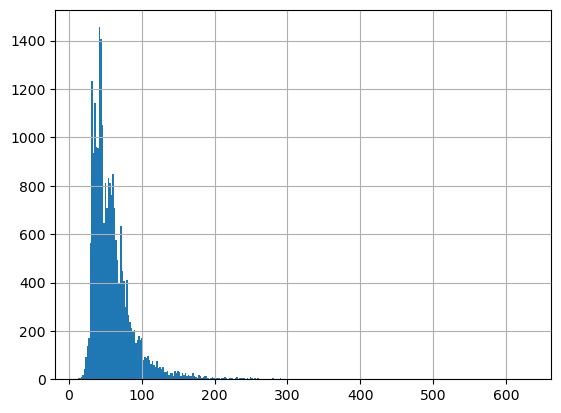

In [44]:
# Построим гистограмму для общей площади
# Сейчас и в дальнейшем для определения количества bins будем пользоваться функцией np.histogram_bin_edges с параметром bins='auto'
data['total_area'].hist(bins=np.histogram_bin_edges(data['total_area'], bins='auto'))

<Axes: >

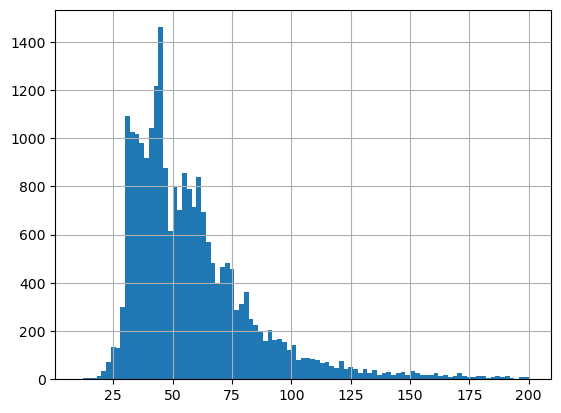

In [45]:
# Из гистограммы видно, что большинство значений лежат в диапазоне от ~10 до 200 кв. метров
# Ограничим гистограмму этим диапазоном, чтобы лучше рассмотреть распределение
data['total_area'].hist(bins=np.histogram_bin_edges(data['total_area'], bins='auto', range=(10, 200)))

In [46]:
# Посмотрим на описание столбца для жилой площади
data['living_area'].describe()

count    23691.000000
mean        34.252473
std         21.283362
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        347.500000
Name: living_area, dtype: float64

<Axes: >

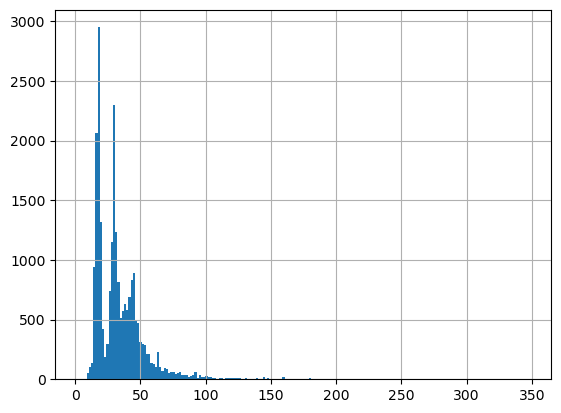

In [47]:
# Построим гистограмму для жилой площади
data['living_area'].hist(bins=np.histogram_bin_edges(data['living_area'], bins='auto'))

<Axes: >

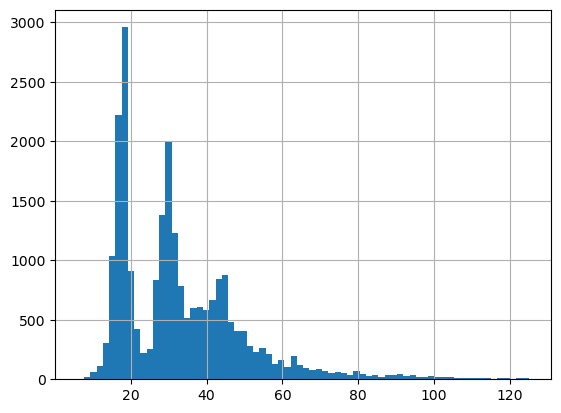

In [48]:
# Из гистограммы видно, что большинство значений лежат в диапазоне от ~6 до 100 кв. метров
# Ограничим гистограмму этим диапазоном, чтобы лучше рассмотреть распределение
data['living_area'].hist(bins=np.histogram_bin_edges(data['living_area'], bins='auto', range=(6, 125)))

### Напишите общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [ ]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [ ]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [ ]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [ ]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [ ]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [ ]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — общая площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении
